In [1]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit import IBMQ,Aer,transpile,assemble
from qiskit.visualization import plot_histogram,plot_bloch_multivector,array_to_latex
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state
IBMQ.save_account('eb264c4a6d39359629fc0dd4d0031812fb511701c624409f3dd905af17e33f3d6d792b9b0b449b1931f1acdb2578aee7cde105c736e48c735e20603a378299c8')
provider=IBMQ.load_account()


C:\Users\Kesha\AppData\Local\Temp\ipykernel_7872\3716117146.py:7: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('eb264c4a6d39359629fc0dd4d0031812fb511701c624409f3dd905af17e33f3d6d792b9b0b449b1931f1acdb2578aee7cde105c736e48c735e20603a378299c8')
C:\Users\Kesha\AppData\Local\Temp\ipykernel_7872\3716117146.py:7: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'

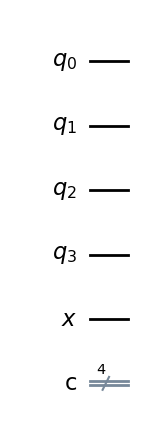

In [2]:
n=int(input())
n_qubits=QuantumRegister(n,name='q')
x=QuantumRegister(1,name='x')
n_bits=ClassicalRegister(n,name='c')
circuit=QuantumCircuit(n_qubits,x,n_bits)
circuit.draw(output='mpl')

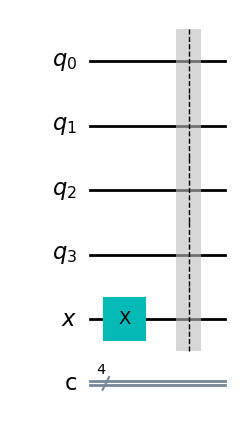

In [3]:
circuit.x(x)
circuit.barrier()
circuit.draw(output='mpl')

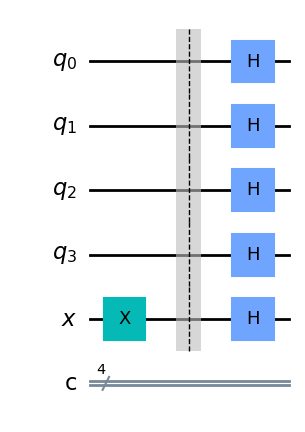

In [4]:
for i in range(n+1):
    circuit.h(i)
circuit.draw(output='mpl')


In [5]:
def oracle(type,circuit,number_of_bits):
    if type==0:
        pass
    elif type==1:
        circuit.x(n)
    elif type==2:
        for i in range(number_of_bits):
            circuit.cx(i,n)
    else:
        print("Invalid Input")
        exit()


Enter input for oracle function:
0 for constant 0.
1 for constant 1.
2 for balanced



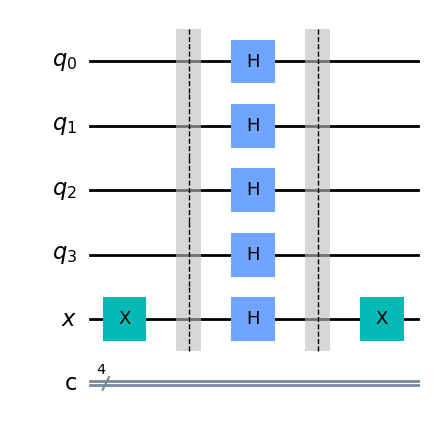

In [6]:
circuit.barrier()
print("Enter input for oracle function:")
print("0 for constant 0.\n1 for constant 1.\n2 for balanced\n")
type=int(input())
oracle(type,circuit,n)
circuit.draw(output='mpl')


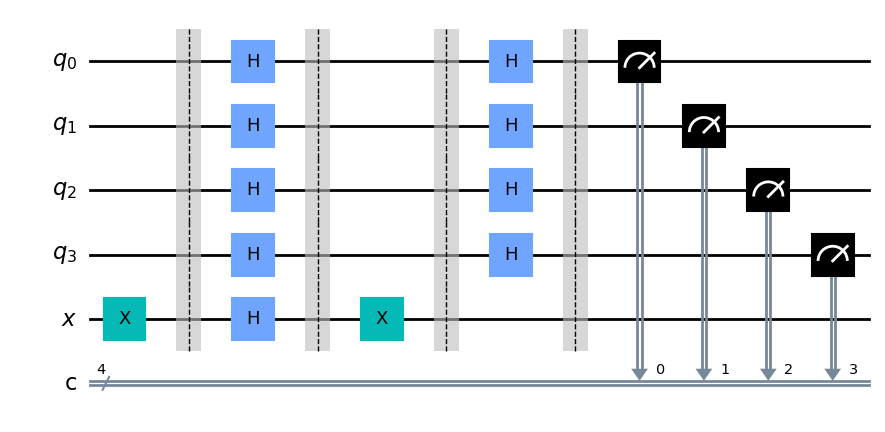

In [7]:
circuit.barrier()
for i in range(n):
    circuit.h(i)
circuit.barrier()
for i in range(n):
    circuit.measure(i,i)
circuit.draw(output='mpl')

{'0000': 1000}


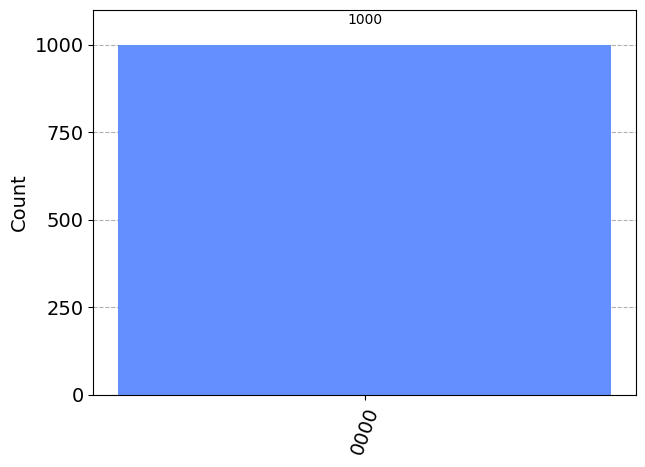

In [11]:
sim=Aer.get_backend('qasm_simulator')
# sim.save_statevector()
counts=sim.run(circuit,shots=1000).result().get_counts()
print(counts)
plot_histogram(counts)


In [9]:
# provider=IBMQ.get_provider(hub='ibm-q')
# from qiskit.providers.ibmq import least_busy
# from qiskit.tools.monitor import job_monitor
# backend=least_busy(provider.backends(filters= lambda b: b.configuration().n_qubits>=5 and not b.configuration().simulator and b.status().operational==True))
# t_qc=transpile(circuit,backend)
# job=backend.run(t_qc,shots=1000)
# job_monitor(job)

Job Status: job has successfully run


{'0000': 3885, '0001': 33, '0010': 34, '0100': 17, '1000': 30, '1100': 1}


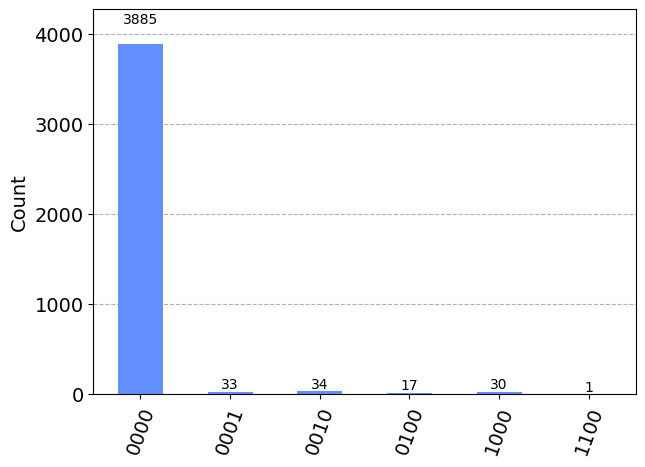

In [10]:
# exp_result=job.result()
# exp_counts=exp_result.get_counts(circuit)
# print(exp_counts)
# plot_histogram(exp_counts)